In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('wisconsin breast cancer data.csv')
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#id is irrelevant to the dataset, so we will drop it
df = df.drop(columns = 'id')

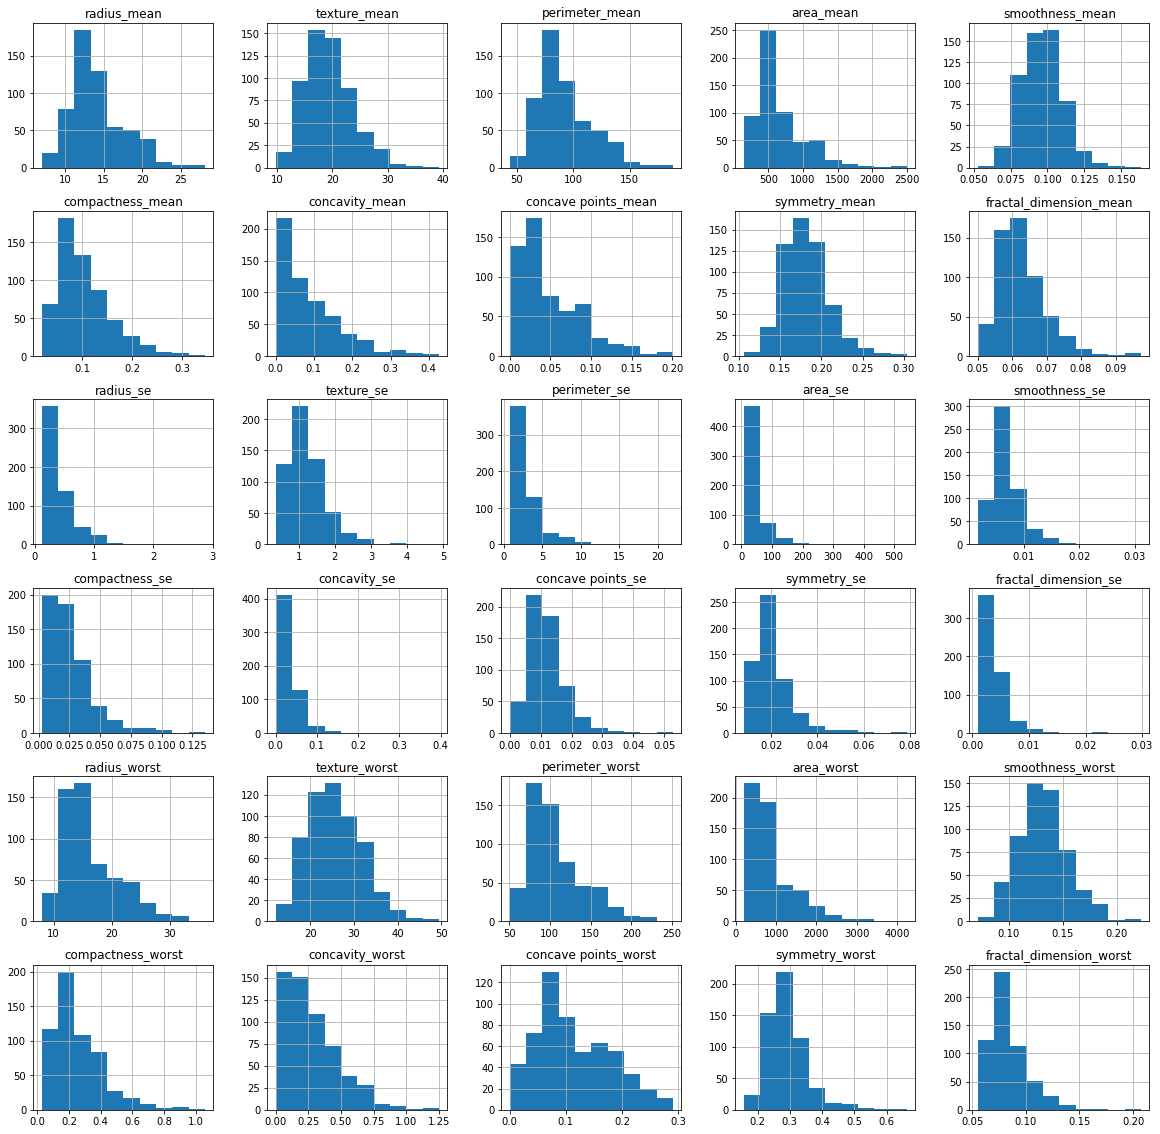

In [19]:
df.hist(figsize = (20,20))
plt.show()

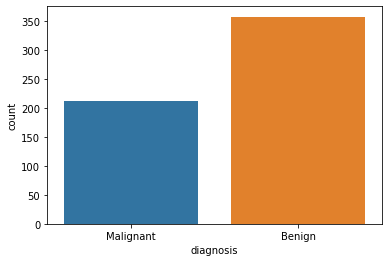

In [5]:
ax = sns.countplot(data = df, x = 'diagnosis')
ax.set_xticklabels(['Malignant', 'Benign'])
plt.show()

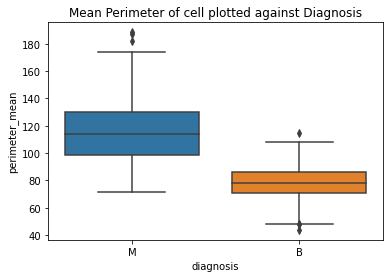

In [6]:
sns.boxplot(x='diagnosis', y='perimeter_mean', data=df)
plt.title('Mean Perimeter of cell plotted against Diagnosis')
plt.show()

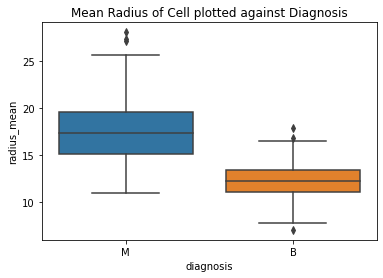

In [7]:
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.title('Mean Radius of Cell plotted against Diagnosis')
plt.show()

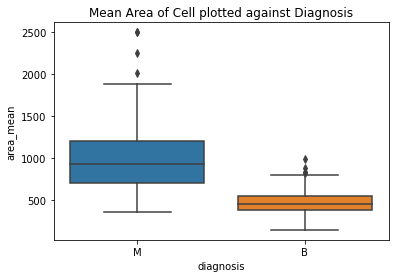

In [8]:
sns.boxplot(x='diagnosis', y='area_mean', data=df)
plt.title('Mean Area of Cell plotted against Diagnosis')
plt.show()

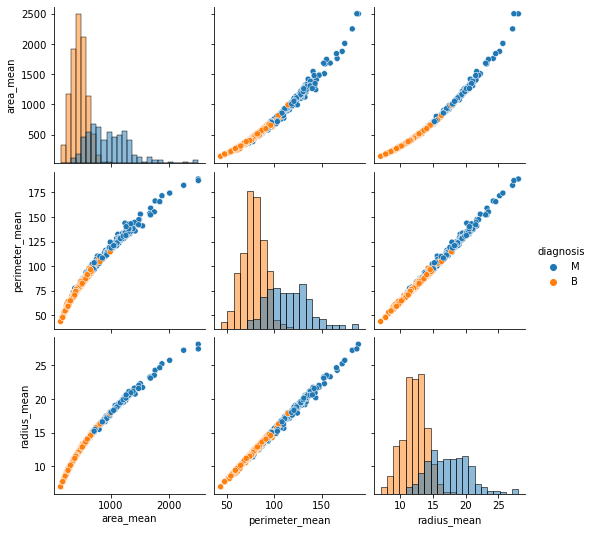

In [24]:
sns.pairplot(df, vars=['area_mean', 'perimeter_mean', 'radius_mean'], hue='diagnosis', diag_kind = 'hist')
plt.show()

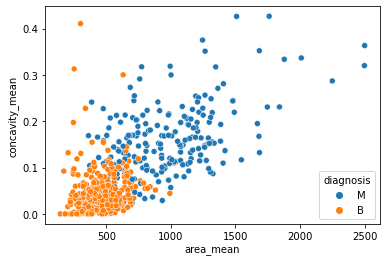

In [21]:
sns.scatterplot(x='area_mean', y='concavity_mean', data=df, hue='diagnosis')
plt.show()

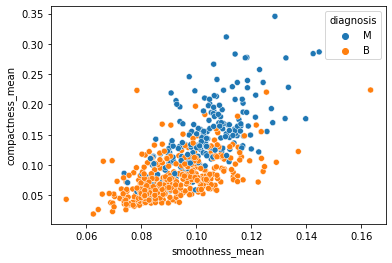

In [20]:
sns.scatterplot(x='smoothness_mean', y='compactness_mean', hue = 'diagnosis', data=df)
plt.show()

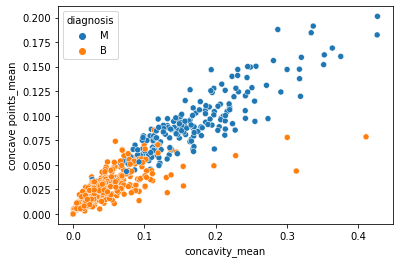

In [12]:
sns.scatterplot(x='concavity_mean', y='concave points_mean', hue = 'diagnosis', data=df)
plt.show()

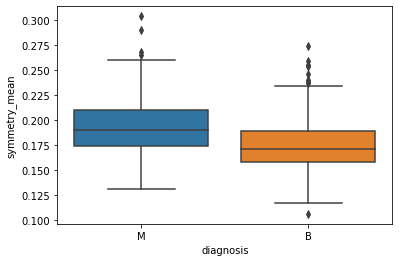

In [14]:
sns.boxplot(x = 'diagnosis', y = 'symmetry_mean', data = df)
plt.show()

In [20]:
#preparing to use our models, train-test split first
X = df.drop(columns = 'diagnosis')
Y = df['diagnosis']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

sm = SMOTE(random_state=10)
X_res, Y_res = sm.fit_resample(X_train, Y_train)


Logistic Regression

Accuracy: 0.95
False Positive Rate: 0.05
False Negative Rate: 0.05
Precision: 0.90
Recall: 0.95

Decision Tree

Accuracy: 0.94
False Positive Rate: 0.08
False Negative Rate: 0.02
Precision: 0.87
Recall: 0.98

Random Forest

Accuracy: 0.99
False Positive Rate: 0.02
False Negative Rate: 0.00
Precision: 0.97
Recall: 1.00


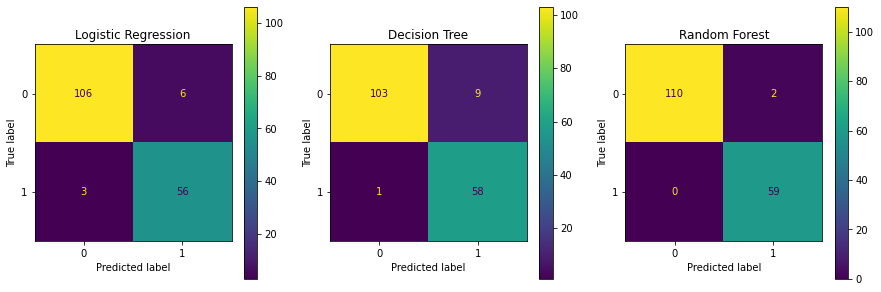

In [36]:
#set seed
np.random.seed(10)

#define models
models = {
          "Logistic Regression": LogisticRegression(),
          "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier()
}

#create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

#loop over models and calculate metrics
for i, (name, model) in enumerate(models.items()):
    model.fit(X_res, Y_res)
    Y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
    accuracy = (tn + tp) / (tn + fp + fn + tp)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)
    print("\n" + name + "\n")
    print("Accuracy: {:.2f}".format(accuracy))
    print("False Positive Rate: {:.2f}".format(fpr))
    print("False Negative Rate: {:.2f}".format(fnr))
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    
    #plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_pred))
    disp.plot(ax=axs[i])
    axs[i].set_title(name)

plt.show()
